In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the dataset
data = pd.read_csv("Downloads/random_data.csv")

# Step 3: Generate synthetic labels (Binary: 0 or 1)
np.random.seed(42)  # For reproducibility
data['label'] = np.random.choice([0, 1], size=len(data))

# Step 4: Split the data into features (X) and target (y)
X = data[['x1', 'y1']]
y = data['label']

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Initialize the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Step 7: Train the model
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 10: Display the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.6666666666666666

Confusion Matrix:
 [[ 1 10]
 [ 0 19]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.66      1.00      0.79        19

    accuracy                           0.67        30
   macro avg       0.83      0.55      0.48        30
weighted avg       0.78      0.67      0.56        30



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


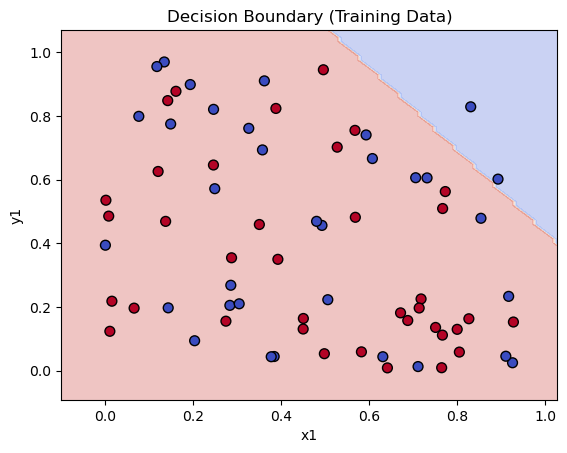

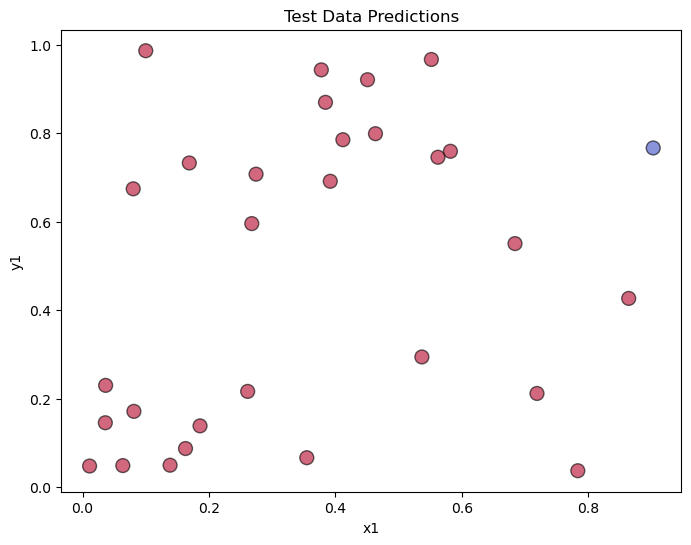

In [8]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv("Downloads/random_data.csv")

# Step 3: Generate synthetic labels (Binary: 0 or 1)
np.random.seed(42)
data['label'] = np.random.choice([0, 1], size=len(data))

# Step 4: Split the data into features (X) and target (y)
X = data[['x1', 'y1']]
y = data['label']

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Initialize and train the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Step 7: Define a function to plot the decision boundary
def plot_decision_boundary(X, y, model, title="Perceptron Decision Boundary"):
    # Create a mesh grid for plotting the decision boundary
    x_min, x_max = X['x1'].min() - 0.1, X['x1'].max() + 0.1
    y_min, y_max = X['y1'].min() - 0.1, X['y1'].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict class labels for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot the training data points
    plt.scatter(X['x1'], X['y1'], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('y1')
    plt.show()

# Step 8: Plot the decision boundary using training data
plot_decision_boundary(X_train, y_train, model, title="Decision Boundary (Training Data)")

# Step 9: Evaluate the model and plot the test data points with predictions
y_pred = model.predict(X_test)

# Plot test data with correct/incorrect predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test['x1'], X_test['y1'], c=y_pred, cmap=plt.cm.coolwarm, edgecolors='k', s=100, alpha=0.6)
plt.title("Test Data Predictions")
plt.xlabel('x1')
plt.ylabel('y1')
plt.show()
